# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response_btc = requests.get(btc_url).json()
response_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19593181,
   'total_supply': 19593181,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 46893.0,
     'volume_24h': 39485094484,
     'market_cap': 918577200219,
     'percentage_change_1h': -0.228002659188649,
     'percentage_change_24h': 6.00292031726927,
     'percentage_change_7d': 7.36365670670899,
     'percent_change_1h': -0.228002659188649,
     'percent_change_24h': 6.00292031726927,
     'percent_change_7d': 7.36365670670899},
    'CAD': {'price': 63704.1405,
     'volume_24h': 53640500856.514,
     'market_cap': 1247887126497.51,
     'percent_change_1h': -0.228002659188649,
     'percent_change_24h': 6.00292031726927,
     'percent_change_7d': 7.36365670670899}},
   'last_updated': 1704748256}},
 'metadata': {'timestamp': 1704748256,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
current_btc_price = 63704.1405

In [7]:
# Fetch current ETH price

response_eth = requests.get(eth_url).json()
response_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120184189,
   'total_supply': 120184189,
   'max_supply': 120184189,
   'quotes': {'USD': {'price': 2345.52,
     'volume_24h': 25746195131,
     'market_cap': 281363836598,
     'percentage_change_1h': -0.474981970068946,
     'percentage_change_24h': 4.48604478391816,
     'percentage_change_7d': 0.365258855478646,
     'percent_change_1h': -0.474981970068946,
     'percent_change_24h': 4.48604478391816,
     'percent_change_7d': 0.365258855478646},
    'CAD': {'price': 3186.38892,
     'volume_24h': 34976206085.4635,
     'market_cap': 382232772018.383,
     'percent_change_1h': -0.474981970068946,
     'percent_change_24h': 4.48604478391816,
     'percent_change_7d': 0.365258855478646}},
   'last_updated': 1704748265}},
 'metadata': {'timestamp': 1704748265,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
current_eth_price = 3186.38892

In [9]:
# Compute current value of my crypto

my_btc_value = my_btc * current_btc_price
my_btc_value

76444.9686

In [10]:
my_eth_value = my_eth * current_eth_price
my_eth_value

16887.861276

In [11]:
total_crypto_wallet = my_btc_value + my_eth_value
total_crypto_wallet

93332.82987599999

In [12]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $76444.97
The current value of your 5.3 ETH is $16887.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, secret_key, api_version='v2') 

In [15]:
# Format current date as ISO format
today = pd.Timestamp('2023-12-29',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [16]:
# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio

close     high     low  trade_count    open  \
timestamp                                                                 
2023-12-29 05:00:00+00:00   99.25   99.425   99.13        26060   99.20   
2023-12-29 05:00:00+00:00  475.31  477.030  473.30       604247  476.49   

                              volume        vwap symbol  
timestamp                                                
2023-12-29 05:00:00+00:00    7327722   99.285422    AGG  
2023-12-29 05:00:00+00:00  122268009  475.364010    SPY

In [17]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol',axis=1)

In [18]:
AGG

close    high    low  trade_count  open   volume  \
timestamp                                                                     
2023-12-29 05:00:00+00:00  99.25  99.425  99.13        26060  99.2  7327722   

                                vwap  
timestamp                             
2023-12-29 05:00:00+00:00  99.285422

In [19]:
SPY

close    high    low  trade_count    open  \
timestamp                                                               
2023-12-29 05:00:00+00:00  475.31  477.03  473.3       604247  476.49   

                              volume       vwap  
timestamp                                        
2023-12-29 05:00:00+00:00  122268009  475.36401

In [20]:
# Concatenate the ticker DataFrames

df_portfolio = pd.concat([AGG,SPY], axis = 1, keys = ['AGG','SPY'])

# Preview DataFrame

df_portfolio

AGG                                            \
                           close    high    low trade_count  open   volume   
timestamp                                                                    
2023-12-29 05:00:00+00:00  99.25  99.425  99.13       26060  99.2  7327722   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-12-29 05:00:00+00:00  99.285422  475.31  477.03  473.3      604247   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-29 05:00:00+00:00  476.49  122268009  475.36401

In [21]:
# Pick AGG and SPY close prices

AGG_close_price = df_portfolio['AGG']['close'].iloc[0]
SPY_close_price = df_portfolio['SPY']['close'].iloc[0]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $99.25
Current SPY closing price: $475.31


In [22]:
# Compute the current value of shares

AGG_value = AGG_close_price * my_agg
SPY_value = SPY_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $23765.50
The current value of your 200 AGG shares is $19850.00


In [23]:
total_shares = AGG_value + SPY_value
print(f"${total_shares}")

$43615.5


### Savings Health Analysis

In [57]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# already done above (total_crypto_wallet and total_shares)

# Create savings DataFrame

df_savings = pd.DataFrame({"amount": [total_crypto_wallet, total_shares]}, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  93332.829876
shares  43615.500000

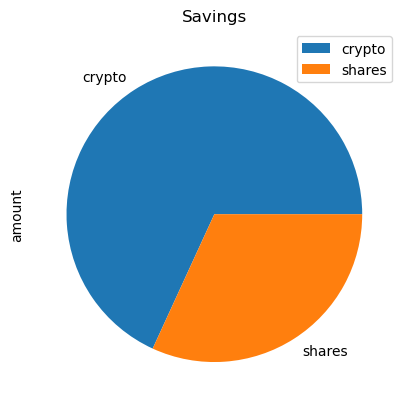

In [25]:
# Plot savings pie chart

df_savings.plot.pie(y='amount',title='Savings');

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_wallet + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money for an emergency fund.")
if total_savings == emergency_fund:
    print("Congratulations! You've reached your emergency fund goal.")
if total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} short from reaching your goal.")

Congratulations! You have enough money for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-30', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers,timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()


SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-12-31 05:00:00+00:00  250.08  250.19  247.47      591024  249.56   
2019-01-02 05:00:00+00:00  250.23  251.21  245.95      603603  245.98   
2019-01-03 05:00:00+00:00  244.15  248.57  243.67      698036  248.23   
2019-01-04 05:00:00+00:00  252.39  253.11  247.17      708230  247.59   
2019-01-07 05:00:00+00:00  254.29  255.95  251.69      449993  252.69   

                                                     AGG                     \
                              volume        vwap   close     high       low   
timestamp                                                                     
2018-12-31 05:00:00+00:00  147557713  249.158331  106.49  106.510  106.1100   
2019-01-02 05:00:00+00:00  132165224  249.138858  106.57  106.610  106.4701   
2019-01-03 05:00:00+00:00  146823673  245.630167  107.01  107.075  106.5700   
2019-01-04 05:00:00+00:00  145055352  250.484620  106.69  106.720  106.5500   
2019-01-07 05:00:00+00:00  105208591  254.071648  106.51  106.790  106.4600   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2018-12-31 05:00:00+00:00       27920  106.12  10613435  106.394350  
2019-01-02 05:00:00+00:00       27947  106.55  11665497  106.543515  
2019-01-03 05:00:00+00:00       20214  106.57   6661940  106.935661  
2019-01-04 05:00:00+00:00       19548  106.66   8392420  106.640950  
2019-01-07 05:00:00+00:00       23936  106.72   7636381  106.586821

In [29]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights=None,
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:      <no docstring>
File:           ~/Desktop/Module-5-Challenge/MCForecastTools1.py
Type:           type
Subclasses:     

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days=252*30,
)

In [31]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-12-31 05:00:00+00:00  250.08  250.19  247.47      591024  249.56   
2019-01-02 05:00:00+00:00  250.23  251.21  245.95      603603  245.98   
2019-01-03 05:00:00+00:00  244.15  248.57  243.67      698036  248.23   
2019-01-04 05:00:00+00:00  252.39  253.11  247.17      708230  247.59   
2019-01-07 05:00:00+00:00  254.29  255.95  251.69      449993  252.69   

                                                                  AGG  \
                              volume        vwap daily_return   close   
timestamp                                                               
2018-12-31 05:00:00+00:00  147557713  249.158331          NaN  106.49   
2019-01-02 05:00:00+00:00  132165224  249.138858     0.000600  106.57   
2019-01-03 05:00:00+00:00  146823673  245.630167    -0.024298  107.01   
2019-01-04 05:00:00+00:00  145055352  250.484620     0.033750  106.69   
2019-01-07 05:00:00+00:00  105208591  254.071648     0.007528  106.51   

                                                                            \
                              high       low trade_count    open    volume   
timestamp                                                                    
2018-12-31 05:00:00+00:00  106.510  106.1100       27920  106.12  10613435   
2019-01-02 05:00:00+00:00  106.610  106.4701       27947  106.55  11665497   
2019-01-03 05:00:00+00:00  107.075  106.5700       20214  106.57   6661940   
2019-01-04 05:00:00+00:00  106.720  106.5500       19548  106.66   8392420   
2019-01-07 05:00:00+00:00  106.790  106.4600       23936  106.72   7636381   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-12-31 05:00:00+00:00  106.394350          NaN  
2019-01-02 05:00:00+00:00  106.543515     0.000751  
2019-01-03 05:00:00+00:00  106.935661     0.004129  
2019-01-04 05:00:00+00:00  106.640950    -0.002990  
2019-01-07 05:00:00+00:00  106.586821    -0.001687

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4          5         6    \
0      1.000000  1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
1      1.006403  1.000764  0.999633   1.012126  0.987542   0.993095  1.000136   
2      1.001947  1.002383  1.005366   1.012464  0.984474   0.989930  1.000431   
3      0.987042  0.996027  1.018856   1.007315  0.984179   0.986690  1.003851   
4      0.989941  0.991048  1.022203   1.007237  0.974849   0.990148  1.005362   
...         ...       ...       ...        ...       ...        ...       ...   
7556  11.464905  6.900042  5.806228  13.136427  4.568451  13.267071  8.562108   
7557  11.358429  7.027070  5.870969  13.004080  4.590275  13.218680  8.638786   
7558  11.358284  7.053674  5.898481  12.918411  4.590707  13.177739  8.515783   
7559  11.459127  7.066184  5.878404  12.688223  4.542515  13.305894  8.581013   
7560  11.581042  7.124207  5.873340  12.795501  4.578583  13.361532  8.429081   

           7          8         9    ...        490        491       492  \
0     1.000000   1.000000  1.000000  ...   1.000000   1.000000  1.000000   
1     0.998851   1.001126  1.004263  ...   1.006818   1.003142  0.993985   
2     0.987656   0.999633  1.008560  ...   1.005529   0.988156  1.018517   
3     0.987115   1.009949  1.002323  ...   0.998584   0.992848  1.034289   
4     0.981814   1.006239  0.997181  ...   0.989916   0.984590  1.040646   
...        ...        ...       ...  ...        ...        ...       ...   
7556  3.528287  11.490418  4.643881  ...  16.287415  12.258967  5.319003   
7557  3.540670  11.566390  4.739179  ...  16.179202  12.273645  5.305202   
7558  3.569727  11.476341  4.740439  ...  16.197196  12.274928  5.345751   
7559  3.562755  11.388241  4.705346  ...  16.060290  12.230245  5.358803   
7560  3.604451  11.374428  4.667349  ...  16.179269  12.037224  5.416567   

            493        494       495        496        497       498       499  
0      1.000000   1.000000  1.000000   1.000000   1.000000  1.000000  1.000000  
1      1.001932   1.009848  0.989513   1.010551   1.000166  1.002021  0.987096  
2      1.002338   1.004558  0.995822   1.003747   1.006715  1.003167  0.986695  
3      1.001248   1.014177  0.989277   1.000829   1.004096  0.992323  0.987442  
4      1.007585   1.033863  0.992480   1.001308   1.015261  1.001257  0.985633  
...         ...        ...       ...        ...        ...       ...       ...  
7556  18.772157  36.800379  9.490234  20.731363  20.499709  6.724369  6.379730  
7557  18.641678  37.397044  9.566415  20.918607  20.460581  6.725436  6.449112  
7558  18.676887  37.339141  9.537601  20.803656  20.738102  6.686850  6.389345  
7559  18.761871  36.900346  9.528381  20.798005  20.726757  6.707458  6.364579  
7560  18.658379  37.013238  9.455017  20.903021  20.604160  6.747828  6.397056  

[7561 rows x 500 columns]

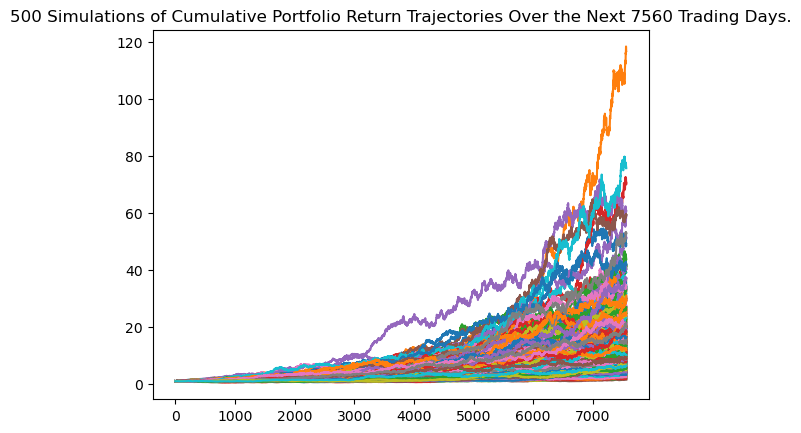

In [33]:
# Plot simulation outcomes
line_plot_30yr = MC_30years.plot_simulation()

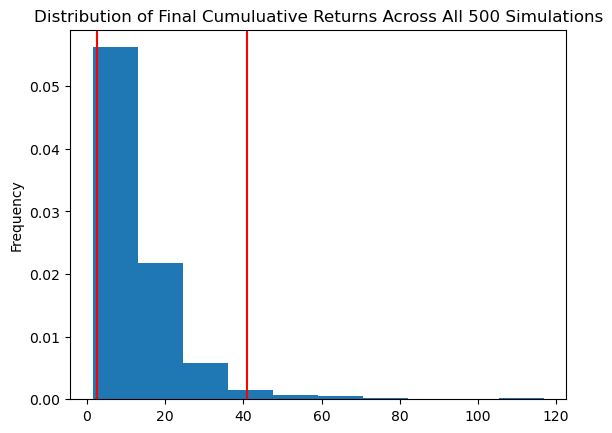

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_30yr = MC_30years.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_results_30yr = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(MCS_results_30yr) 

count           500.000000
mean             13.039235
std              11.126414
min               1.519463
25%               6.116273
50%               9.880187
75%              16.228307
max             116.823617
95% CI Lower      2.688973
95% CI Upper     41.065535
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MCS_results_30yr[8]*20000,2)
ci_upper = round(MCS_results_30yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53779.46 and $821310.69


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/368254637.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*20000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/368254637.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*20000,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MCS_results_30yr[8]*30000,2)
ci_upper = round(MCS_results_30yr[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $80669.2 and $1231966.04


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/3709348466.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*30000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/3709348466.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*30000,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# as per BCS, because of the shortened investment horizon, the portfolio needs to invest more heavily in the riskier asset—that is, stock—to help accumulate wealth for retirement
# weights adjusted to 80% stock and 20% bond

MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days=252*5,
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.022001  1.007991  0.995469  1.008930  1.014021  1.002174  0.996791   
2     1.004510  1.010162  1.007054  1.020458  1.017504  1.016227  0.986797   
3     1.025994  1.003678  1.001678  1.006720  1.020021  1.044560  0.974240   
4     1.026637  1.000819  0.978377  1.016236  1.023535  1.054697  0.966414   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.320978  2.408994  1.293857  2.015314  1.710997  1.682720  4.200822   
1257  1.332995  2.366659  1.287846  2.037437  1.715743  1.687782  4.181791   
1258  1.331170  2.387036  1.279032  2.018124  1.739590  1.717348  4.244645   
1259  1.329640  2.399357  1.282188  1.973086  1.734695  1.731388  4.240226   
1260  1.314451  2.439757  1.321278  1.961659  1.700754  1.718230  4.197997   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994484  0.998821  1.003808  ...  0.984226  1.000619  0.977965   
2     0.993091  0.998832  1.017279  ...  0.984224  1.008139  0.983877   
3     0.978133  0.990040  1.033600  ...  0.975418  0.987812  0.994070   
4     0.983464  1.003676  1.040701  ...  0.978183  0.977575  0.989979   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.277343  1.658323  1.745983  ...  2.219043  1.295990  2.513637   
1257  2.261469  1.636150  1.733683  ...  2.253521  1.278520  2.499377   
1258  2.217111  1.655999  1.745539  ...  2.244398  1.282001  2.538380   
1259  2.251875  1.650242  1.747887  ...  2.283258  1.292533  2.558194   
1260  2.237628  1.645751  1.767194  ...  2.322548  1.310946  2.576273   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.019619  0.997802  1.004032  1.001705  0.999327  1.009254  0.997496  
2     1.024017  0.982158  1.003972  1.009280  1.002785  1.012720  1.002659  
3     1.018196  0.996422  0.994039  1.010477  1.002988  1.005245  1.012973  
4     1.007106  1.006993  0.998970  1.011262  1.003691  1.005014  1.002365  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.553091  2.434706  2.339273  1.228218  1.864272  0.848768  0.915596  
1257  1.541485  2.501338  2.368649  1.241581  1.872515  0.856786  0.909918  
1258  1.530295  2.448730  2.370645  1.238867  1.856408  0.859093  0.909275  
1259  1.562537  2.449687  2.416695  1.218603  1.859843  0.861630  0.904116  
1260  1.535011  2.436325  2.425210  1.230801  1.873651  0.870355  0.894808  

[1261 rows x 500 columns]

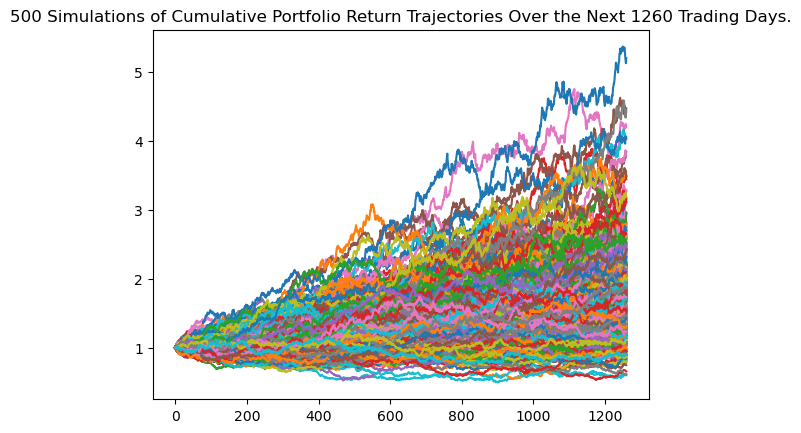

In [40]:
# Plot simulation outcomes
line_plot_5yr = MC_5years.plot_simulation()

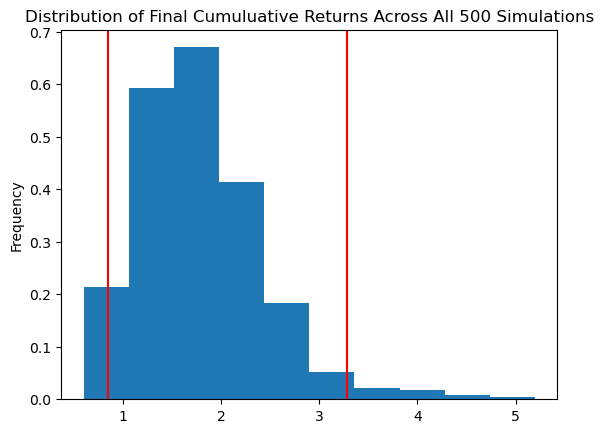

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5years.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_5y_results = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MCS_5y_results)

count           500.000000
mean              1.788356
std               0.638690
min               0.601040
25%               1.335684
50%               1.724056
75%               2.141681
max               5.197003
95% CI Lower      0.848058
95% CI Upper      3.280250
Name: 1260, dtype: float64


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MCS_5y_results[8]*60000,2)
ci_upper_five = round(MCS_5y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50883.45 and $196814.98


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/590358477.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_five = round(MCS_5y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/590358477.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_five = round(MCS_5y_results[9]*60000,2)


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days=252*10,
)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.980714  0.997811  0.998264  1.004074  0.979098  1.005270  1.008390   
2     0.981838  0.999421  0.974075  0.987223  0.974395  1.000877  1.040758   
3     0.987843  1.007895  0.975074  0.988849  0.975113  1.003635  1.033097   
4     1.013096  0.994371  0.966971  0.977304  0.962991  0.999928  1.025331   
...        ...       ...       ...       ...       ...       ...       ...   
2516  5.452552  4.309427  4.760067  3.934298  5.050572  0.699519  2.928066   
2517  5.450546  4.263065  4.694571  3.976699  5.014843  0.701057  2.900405   
2518  5.492219  4.310274  4.738120  4.014693  5.014612  0.707514  2.922855   
2519  5.462718  4.282942  4.788778  3.908821  5.128198  0.696963  2.918181   
2520  5.552820  4.287378  4.765911  3.887498  5.119771  0.674776  2.871371   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.008151  0.992834  1.016028  ...  0.992369  1.016803  0.992030   
2     1.014865  0.994701  1.025231  ...  1.001318  1.004670  0.991984   
3     1.016386  1.014898  1.036227  ...  0.994862  1.015029  0.983910   
4     0.998493  1.002557  1.023682  ...  1.001638  1.016345  0.994840   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.526764  2.059751  2.785428  ...  2.362187  3.602766  2.498544   
2517  1.537088  2.076236  2.785816  ...  2.347518  3.616716  2.509741   
2518  1.548683  2.061826  2.790019  ...  2.349380  3.678766  2.557614   
2519  1.548501  2.065584  2.832167  ...  2.350624  3.645006  2.557379   
2520  1.540172  2.037881  2.817685  ...  2.331622  3.615297  2.582469   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998695  0.995634  1.010251  0.985086  1.014434  1.000137  0.982997  
2     0.987428  0.997187  1.011295  0.988236  1.011039  0.983542  0.967496  
3     0.980155  1.015158  0.999940  0.995714  1.027392  0.996988  0.973322  
4     0.985225  1.013865  0.984559  1.002746  1.037738  0.991747  0.966037  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.770583  2.639660  3.748333  3.647533  2.418466  2.331233  1.751773  
2517  2.822979  2.646063  3.800084  3.623623  2.409157  2.374120  1.745512  
2518  2.816652  2.639313  3.828343  3.547144  2.412971  2.353755  1.755158  
2519  2.830398  2.597480  3.874190  3.544597  2.419418  2.315210  1.765561  
2520  2.795332  2.604878  3.886621  3.566712  2.438142  2.282006  1.776181  

[2521 rows x 500 columns]

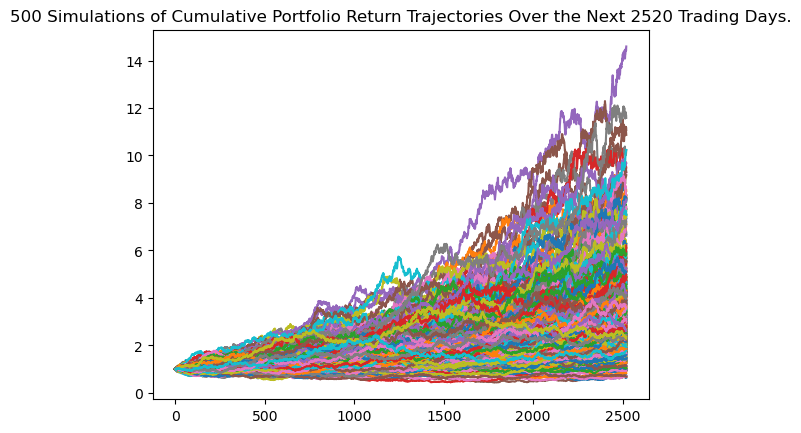

In [46]:
# Plot simulation outcomes
line_plot_10yr = MC_10years.plot_simulation()

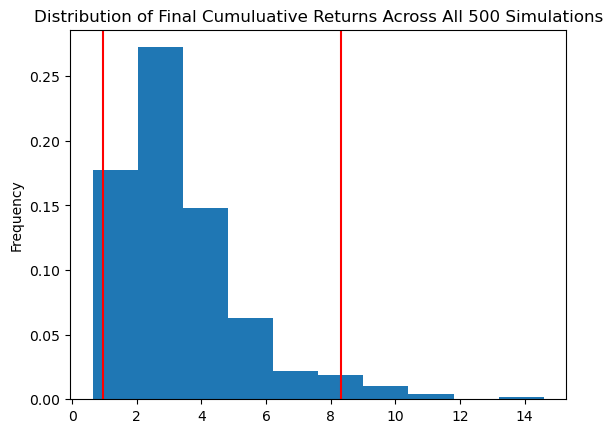

In [47]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10years.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_10y_results = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MCS_10y_results)

count           500.000000
mean              3.339857
std               1.965925
min               0.641965
25%               2.038050
50%               2.811236
75%               4.174818
max              14.593175
95% CI Lower      0.944347
95% CI Upper      8.330168
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MCS_10y_results[8]*60000,2)
ci_upper_ten = round(MCS_10y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56660.83 and $499810.06


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/553208340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_ten = round(MCS_10y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_1941/553208340.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_ten = round(MCS_10y_results[9]*60000,2)


### QUESTIONS

1. Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

* Please see above cell.


2. Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

* Weighting the portfolio more heavily towards stocks, and having a larger initial investmnet of 60,000 dollars, does not allow the credit union members to retire early. It depends on what is acceptable to the client in terms of a retirement fund, as a minimum amount is not specified, however given the results for the 30 year, 5 year, and 10 year forecasts - I would advise a 30 year retirement plan with an initial investment of 30,000 dollars given the Monte Carlo Simulation Results. The 5 and 10 year plan do not yield a great enough return for an individual to retire and live off of. The lower confidence interval for the 30 year plan with a 30,000 dollar initial investment was the greatest, and the upper confidence interval with this plan was significantly higher than the others. While working for an additional number of years as well, the client is able to make more money to further invest and save for their retirement.